In [ ]:
LINKS = []
HASH_TAGS = []

WORDS = []

In [ ]:
import pandas as pd
import numpy as np


In [ ]:
df= pd.read_csv("/content/replies.csv")
df

,user,text
0,brian44182533,@nytimes Who’s money is funding these lotterie...
1,OfAnders121,@nytimes https://t.co/QXv6xlBN15
2,ToddLytle,@nytimes Must be nice
3,ktmacg79,@nytimes ❤️
4,sinjitunohanasi,@nytimes https://t.co/a6PAx0NRCM
5,MissFarai,@nytimes This is nothing to be proud of. Imagi...
6,Ah_ma_rah,@nytimes CAN A CHURCH GIRL BE SEXY AND HIGH FA...
7,bfordski,@nytimes @chischisschissy why is this a thing
8,kolyk,@nytimes @th_alys
9,JoanneC32564892,"@nytimes For me, I will hang up off the phone ..."


In [ ]:
df['no_of_mentions'] = df['text'].str.count("@")


In [ ]:
sample = df.loc[0,'text']
sample

'@nytimes Who’s money is funding these lotteries? And do they agree with where their money is being spent??'

In [ ]:
sample[sample.find("@"):sample.find(" ")+1]

'@nytimes '

In [ ]:
sample[sample.find(" ")+1: ]

'Who’s money is funding these lotteries? And do they agree with where their money is being spent??'

In [ ]:
df['tags_removed'] = df['text'].apply(lambda x : x[x.find(" ")+1: ]+" " )
df

,user,text,no_of_mentions,tags_removed
0,brian44182533,@nytimes Who’s money is funding these lotterie...,1,Who’s money is funding these lotteries? And do...
1,OfAnders121,@nytimes https://t.co/QXv6xlBN15,1,https://t.co/QXv6xlBN15
2,ToddLytle,@nytimes Must be nice,1,Must be nice
3,ktmacg79,@nytimes ❤️,1,❤️
4,sinjitunohanasi,@nytimes https://t.co/a6PAx0NRCM,1,https://t.co/a6PAx0NRCM
5,MissFarai,@nytimes This is nothing to be proud of. Imagi...,1,This is nothing to be proud of. Imagine having...
6,Ah_ma_rah,@nytimes CAN A CHURCH GIRL BE SEXY AND HIGH FA...,1,CAN A CHURCH GIRL BE SEXY AND HIGH FASHION AT ...
7,bfordski,@nytimes @chischisschissy why is this a thing,2,@chischisschissy why is this a thing
8,kolyk,@nytimes @th_alys,2,@th_alys
9,JoanneC32564892,"@nytimes For me, I will hang up off the phone ...",1,"For me, I will hang up off the phone LOL, l th..."


## Removing Mentions

In [ ]:
df['tags_removed'] =  df['tags_removed'].apply(lambda x: x[x.find(" ")+1: ] if ("@" in x) else x)

In [ ]:
df

,user,text,no_of_mentions,tags_removed
0,brian44182533,@nytimes Who’s money is funding these lotterie...,1,Who’s money is funding these lotteries? And do...
1,OfAnders121,@nytimes https://t.co/QXv6xlBN15,1,https://t.co/QXv6xlBN15
2,ToddLytle,@nytimes Must be nice,1,Must be nice
3,ktmacg79,@nytimes ❤️,1,❤️
4,sinjitunohanasi,@nytimes https://t.co/a6PAx0NRCM,1,https://t.co/a6PAx0NRCM
5,MissFarai,@nytimes This is nothing to be proud of. Imagi...,1,This is nothing to be proud of. Imagine having...
6,Ah_ma_rah,@nytimes CAN A CHURCH GIRL BE SEXY AND HIGH FA...,1,CAN A CHURCH GIRL BE SEXY AND HIGH FASHION AT ...
7,bfordski,@nytimes @chischisschissy why is this a thing,2,why is this a thing
8,kolyk,@nytimes @th_alys,2,
9,JoanneC32564892,"@nytimes For me, I will hang up off the phone ...",1,"For me, I will hang up off the phone LOL, l th..."


### Removing links

In [ ]:
for x in df['tags_removed']:
  if ("http" in x):
    link = x[x.find("http") : x.find(" ")+1]
    print(link)
    LINKS.append(link)

https://t.co/QXv6xlBN15 
https://t.co/a6PAx0NRCM 

https://t.co/KMjN8QwYVk 



In [ ]:
df['links_removed'] =  df['tags_removed'].apply(lambda x: x[x.find(" ")+1: ] if ("http" in x) else x)

In [ ]:
df

,user,text,no_of_mentions,tags_removed,links_removed
0,brian44182533,@nytimes Who’s money is funding these lotterie...,1,Who’s money is funding these lotteries? And do...,Who’s money is funding these lotteries? And do...
1,OfAnders121,@nytimes https://t.co/QXv6xlBN15,1,https://t.co/QXv6xlBN15,
2,ToddLytle,@nytimes Must be nice,1,Must be nice,Must be nice
3,ktmacg79,@nytimes ❤️,1,❤️,❤️
4,sinjitunohanasi,@nytimes https://t.co/a6PAx0NRCM,1,https://t.co/a6PAx0NRCM,
5,MissFarai,@nytimes This is nothing to be proud of. Imagi...,1,This is nothing to be proud of. Imagine having...,This is nothing to be proud of. Imagine having...
6,Ah_ma_rah,@nytimes CAN A CHURCH GIRL BE SEXY AND HIGH FA...,1,CAN A CHURCH GIRL BE SEXY AND HIGH FASHION AT ...,A CHURCH GIRL BE SEXY AND HIGH FASHION AT THE ...
7,bfordski,@nytimes @chischisschissy why is this a thing,2,why is this a thing,why is this a thing
8,kolyk,@nytimes @th_alys,2,,
9,JoanneC32564892,"@nytimes For me, I will hang up off the phone ...",1,"For me, I will hang up off the phone LOL, l th...","For me, I will hang up off the phone LOL, l th..."


In [ ]:
df = df.drop(columns=['tags_removed', 'no_of_mentions'])
df

,user,text,links_removed
0,brian44182533,@nytimes Who’s money is funding these lotterie...,Who’s money is funding these lotteries? And do...
1,OfAnders121,@nytimes https://t.co/QXv6xlBN15,
2,ToddLytle,@nytimes Must be nice,Must be nice
3,ktmacg79,@nytimes ❤️,❤️
4,sinjitunohanasi,@nytimes https://t.co/a6PAx0NRCM,
5,MissFarai,@nytimes This is nothing to be proud of. Imagi...,This is nothing to be proud of. Imagine having...
6,Ah_ma_rah,@nytimes CAN A CHURCH GIRL BE SEXY AND HIGH FA...,A CHURCH GIRL BE SEXY AND HIGH FASHION AT THE ...
7,bfordski,@nytimes @chischisschissy why is this a thing,why is this a thing
8,kolyk,@nytimes @th_alys,
9,JoanneC32564892,"@nytimes For me, I will hang up off the phone ...","For me, I will hang up off the phone LOL, l th..."


Dropping null rows

In [ ]:
df['links_removed'].apply(lambda x: len(x))

0      98
1       0
2      13
3       3
4       0
5     156
6     255
7      20
8       0
9      67
10     52
11    118
12    109
13     28
14     39
15      7
16      0
17     30
18     83
Name: links_removed, dtype: int64

In [ ]:
df = df.replace("", np.nan)

In [ ]:
df = df.dropna(subset=['links_removed'])

In [ ]:
df

,user,text,links_removed
0,brian44182533,@nytimes Who’s money is funding these lotterie...,Who’s money is funding these lotteries? And do...
2,ToddLytle,@nytimes Must be nice,Must be nice
3,ktmacg79,@nytimes ❤️,❤️
5,MissFarai,@nytimes This is nothing to be proud of. Imagi...,This is nothing to be proud of. Imagine having...
6,Ah_ma_rah,@nytimes CAN A CHURCH GIRL BE SEXY AND HIGH FA...,A CHURCH GIRL BE SEXY AND HIGH FASHION AT THE ...
7,bfordski,@nytimes @chischisschissy why is this a thing,why is this a thing
9,JoanneC32564892,"@nytimes For me, I will hang up off the phone ...","For me, I will hang up off the phone LOL, l th..."
10,Jeremiah_37,@nytimes Good thing she didn't think that abou...,Good thing she didn't think that about the vir...
11,Autarkh,@nytimes @donmoyn Love it. And it's already sh...,Love it. And it's already showing results in i...
12,AliMandela9,"@nytimes Only one winner, it's cool but I woul...","Only one winner, it's cool but I would of pick..."


##Removing the sensitive data

##**classifying the text**

## 

In [ ]:
filesResults=[]

for fileText in df['links_removed']:
    filesResults.append({
        'fileName': fileText,
        'results': client.detection(body={"document": {"text": fileText}}, params={'language': 'en','detector':'pii'})
    })

In [ ]:
import pandas as pandas
import json
from IPython.core.display import display, HTML

pandas.set_option('display.max_rows', None)
mapColoredCell = set()

def coloredCell(s):
    key = '-'.join(s.name[0:3])
    if(key not in mapColoredCell):
        mapColoredCell.add(key)
        return ['border-top: 1px solid !important']
    
    return['']
   
dataToShow = []

for fileResults in filesResults:
    mapInstances = {}
    fieldName=""
    
    for extraction in fileResults['results'].extractions:
        
        if extraction.template in mapInstances:
            mapInstances[extraction.template] += 1
        else:
            mapInstances[extraction.template] = 1
            
        dateCount=0;
        
        for field in extraction.fields:
            fieldName = field.name
            if field.name == "dateTime":
                dateCount+=1
                fieldName+=" #" + str(dateCount)
            row = {
                "file": fileResults['fileName'],
                "template": extraction.template,
                "instance": '#' + str(mapInstances[extraction.template]),
                'field': fieldName,
                'value': field.value
            }

            dataToShow.append(row)
           
dataFrame = pandas.DataFrame(dataToShow)
dataFrame.set_index(['file', 'template', 'instance', 'field'], inplace=True)
leftAlignedDataFrame = dataFrame.style.set_properties(**{'text-align': 'left', 'padding-left': '30px'})  
leftAlignedDataFrame.apply(coloredCell,axis=1)
display(leftAlignedDataFrame)

## Word Cloud

###**Using the key Phrase extraction feature**

In [ ]:
!pip install expertai-nlapi


     |████████████████████████████████| 102kB 3.9MB/s 


In [ ]:
import os
os.environ["EAI_USERNAME"] = 'mynenisp1703@gmail.com'
os.environ["EAI_PASSWORD"] = 'Ready@hack1'

from expertai.nlapi.cloud.client import ExpertAiClient
client = ExpertAiClient()
language = "en"

In [ ]:
"""document = client.specific_resource_analysis(
    body={"document": {"text": df.loc[0,'links_removed']}}, 
    params={'language': language, 'resource': 'relevants'}) """

In [ ]:
"""print (f'{"LEMMA":{20}} {"SCORE":{5}} ')
       
for mainlemma in document.main_lemmas:
    print (f'{mainlemma.value:{20}} {mainlemma.score:{5}}') """

LEMMA                SCORE 
lottery               52.7
money                 47.2


For each row

In [ ]:
All_sentences = list(df['links_removed'])
All_sentences

['Who’s money is funding these lotteries? And do they agree with where their money is being spent?? ',
 'Must be nice ',
 '❤️ ',
 "This is nothing to be proud of. Imagine having to bribe people to make sure they do something so they don't die of a terrible disease and/or infect others. ",
 'A CHURCH GIRL BE SEXY AND HIGH FASHION AT THE SAME TIME?...  Watch my latest fashion video to find out via LINK BELOW ↓  https://t.co/Vl22n8NMrI  PLEASE SUSBCRIBE and Turn on POST NOTIFICATIONS. THANKS!  #viral #trending #highfashion #Christian #YouTuber ',
 'why is this a thing ',
 'For me, I will hang up off the phone LOL, l thought it was a prank ',
 "Good thing she didn't think that about the virus. 😀 ",
 "Love it. And it's already showing results in increased vaccination. Kudos to Gov. DeWine for experimenting with this. ",
 "Only one winner, it's cool but I would of picked ten winners every month until enough people are vaccinated. ",
 'A vaccine lottery. Twisted. ',
 'Good for her, spend and 

In [ ]:
for sentence in All_sentences:
  document = client.specific_resource_analysis(
    body={"document": {"text": sentence }}, 
    params={'language': language, 'resource': 'relevants'})
  for mainlemma in document.main_lemmas:
    WORDS.append(mainlemma.value)

In [ ]:
WORDS

['lottery',
 'money',
 'nice',
 'disease',
 'people',
 'high fashion',
 'GIRL',
 'fashion',
 'video',
 'notification',
 'thanks',
 'LOL',
 'prank',
 'phone',
 'good thing',
 'virus',
 'vaccination',
 'DeWine',
 'kudos',
 'result',
 'winner',
 'people',
 'enough',
 'lottery',
 'vaccine',
 'absurd',
 'youth',
 'young',
 'Palestine']

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import re
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [ ]:
mask = np.array(Image.open('/content/twitter mask.jpg'))

In [ ]:
wc = WordCloud(background_color="white", max_words=2000, mask=mask)
clean_string = ','.join(WORDS)
wc.generate(clean_string)

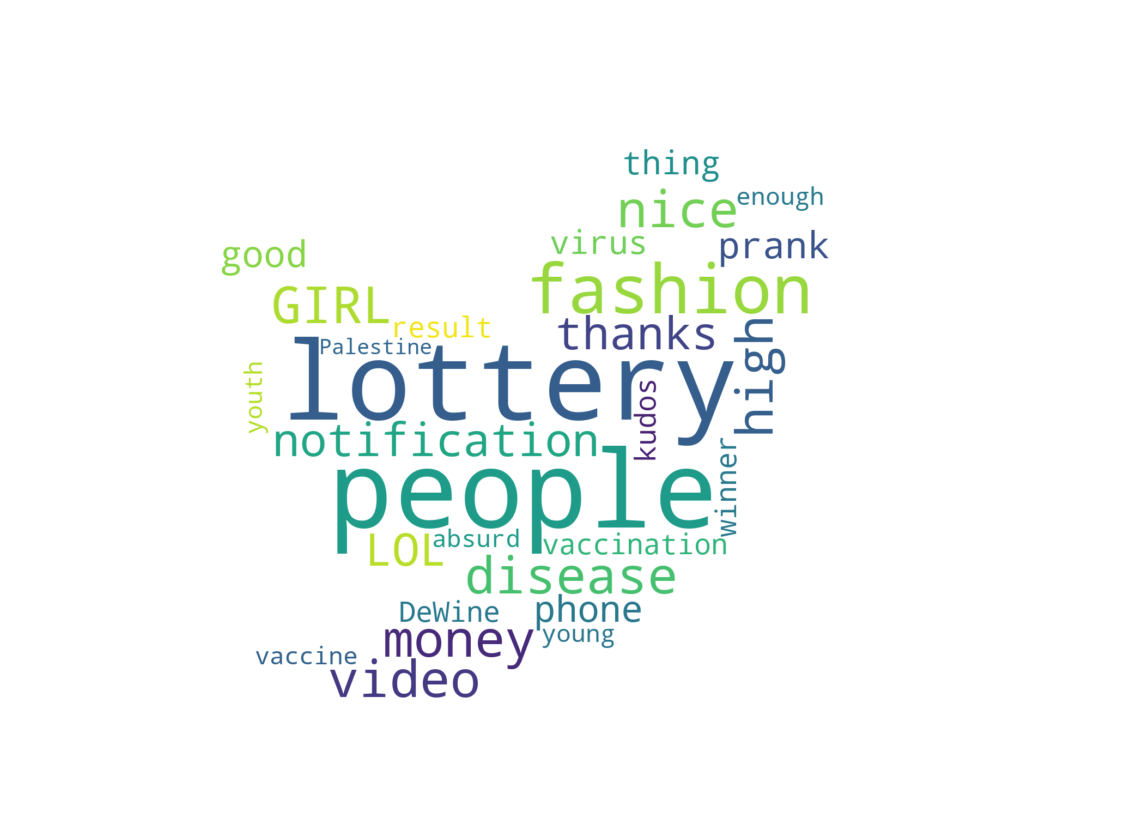

In [ ]:
plt.figure(figsize=(20,20))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()